In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the dataset
df = pd.read_csv('vgsales.csv')

# Basic Exploration
print(df.head())
print(df.info())
print(df.describe())

In [ ]:
# Drop rows with missing values
df_clean = df.dropna()

# Convert the Year column in integer
df_clean['Year'] = df_clean['Year'].astype(int)

# print(df_clean.describe())

In [4]:
# Filter data for the recent years
df_recent = df_clean[df_clean['Year']>=2000]

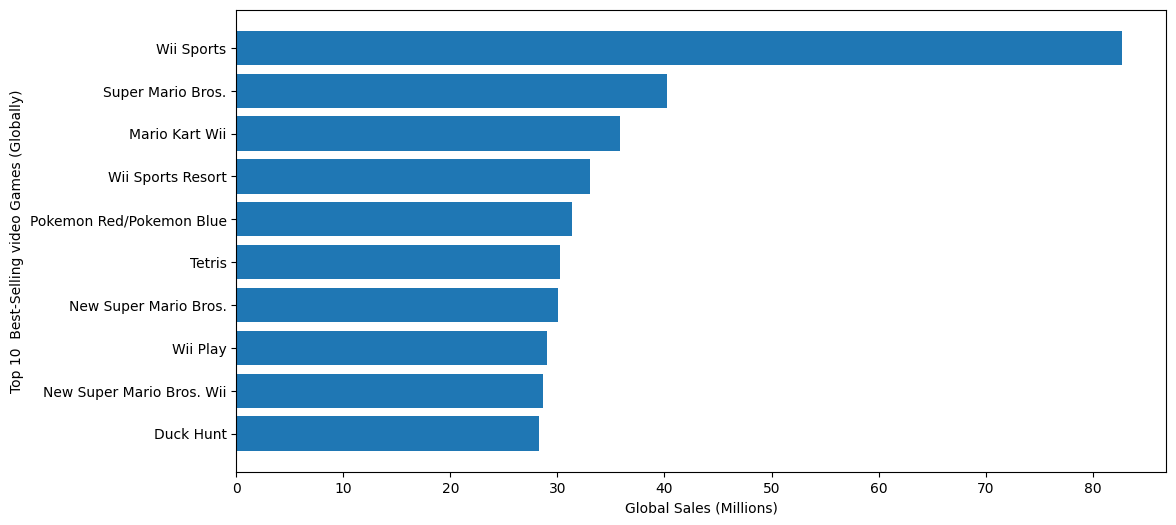

In [5]:
# Plot Top Selling Game of all the time
top_games = df_clean.nlargest(10,'Global_Sales')

fig = plt.figure(figsize=(12, 6))
plt.barh(top_games['Name'],top_games['Global_Sales'])
plt.xlabel("Global Sales (Millions)")
plt.ylabel("Top 10  Best-Selling video Games (Globally)")
plt.gca().invert_yaxis()
plt.show()


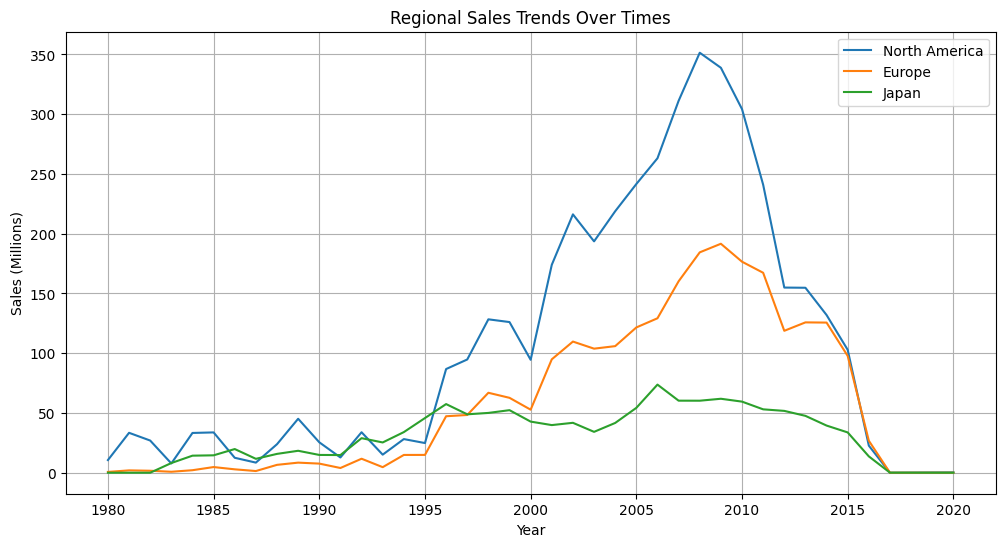

In [6]:
    # Regional Sales Trends
regional_Sales = df_clean.groupby('Year')[['NA_Sales','EU_Sales','JP_Sales']].sum()

fig1 = plt.figure(figsize=(12, 6))
plt.plot(regional_Sales.index,regional_Sales['NA_Sales'],label="North America")
plt.plot(regional_Sales.index,regional_Sales['EU_Sales'],label="Europe")
plt.plot(regional_Sales.index,regional_Sales['JP_Sales'],label="Japan")
plt.xlabel("Year")
plt.ylabel("Sales (Millions)")
plt.title("Regional Sales Trends Over Times")
plt.legend()
plt.grid()
plt.show()

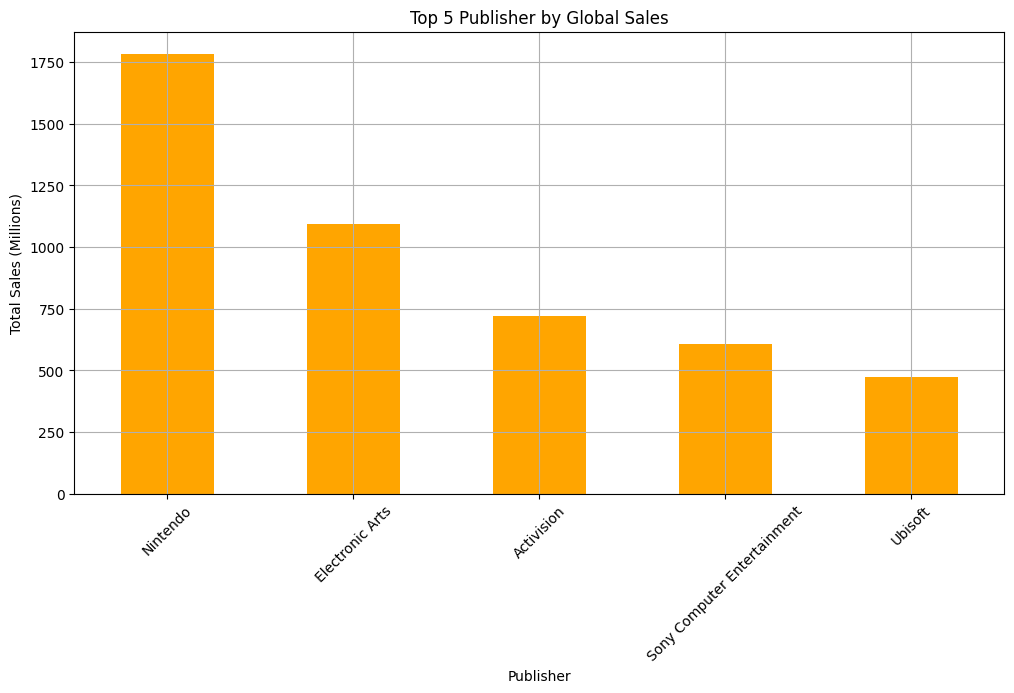

In [7]:
# Publisher Dominance

top_publisher = df_clean.groupby('Publisher')['Global_Sales'].sum().nlargest(5)
fig2 = plt.figure(figsize=(12, 6))
top_publisher.plot(kind='bar',color='orange')
plt.title("Top 5 Publisher by Global Sales")
plt.xlabel("Publisher")
plt.ylabel("Total Sales (Millions)")
plt.xticks(rotation=45)
plt.grid()
plt.show()

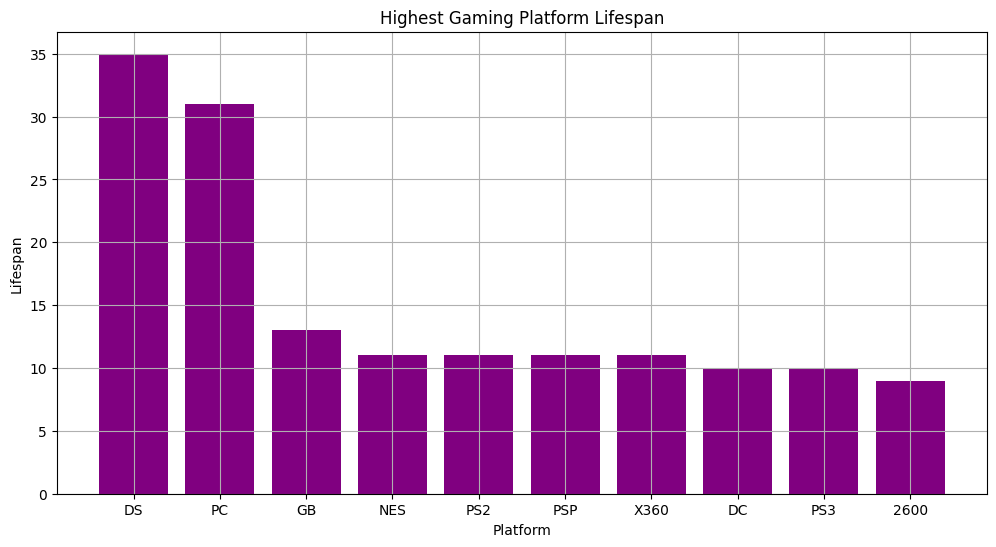

In [15]:
# Gaming Platform Lifespan Analysis
console_years = df_clean.groupby('Platform')['Year'].agg(['min','max'])
console_years['Lifespan'] = console_years['max'] - console_years['min']
console_years = console_years.reset_index()
fig3 = plt.figure(figsize=(12, 6))
top_lifespans = console_years.nlargest(10, 'Lifespan')
plt.bar(top_lifespans.Platform,top_lifespans['Lifespan'],color='purple')
plt.title("Highest Gaming Platform Lifespan")
plt.xlabel("Platform")
plt.ylabel("Lifespan")
plt.grid()
plt.show()